# Week 6 - More about `pandas`


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

We've looked at `Series`, `DataFrame`, how to view, select and index data, and how to make plots with `pandas`. Now we will look at time series data, which `pandas` is simply brilliant for working with. 

'Time series data' refers to any form of data that is represented or indexed with ordered timestamps. Examples include stock prices, electrical activity in the brain, and temperature throughout the day. As you might have guessed, this involves dates, times, and differences between them.

## `Timestamp` and `Timedelta`

In `pandas`, dates and times are represented with `pd.Timestamp`, which is a replacement for Python's native `datetime.datetime` object. The two are interchangeable in many respects, but a key difference is that `pd.Timestamp` uses NumPy's `datetime64` and `timedelta64` data types and incorporates a much wider range of functionality and powerful features for creating and manipulating time series. 

---

>  - `pd.Timestamp` - [Read more here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html)
>  - `datetime.datetime` - [Read more here](https://docs.python.org/3/library/datetime.html)
>  - `datetime64` and `timedelta64` - [Read more here](https://numpy.org/doc/stable/reference/arrays.datetime.html)
 
---

Let's create timestamps to mark two memorable points in history. The First World War ended in 1918 at the eleventh hour of the eleventh day of the eleventh month, and the Second World War ended on the 08 May at one-minute past 11 in the evening. 

In [2]:
end_of_ww1 = pd.Timestamp('1918-11-11 11:00:00')  # Armistice Day
end_of_ww2 = pd.Timestamp('1945-05-08 23:01:00')  # VE Day

`Timestamp` data have many useful methods. An especially useful method is `.strftime()`, which creates a `str` representation of a timestamp using various formatting codes. Here are some examples.

In [3]:
print("The First World War ended", end_of_ww1.strftime('%d %B %Y'), "at", end_of_ww1.strftime('%I:%M %p'))
print("The Second World War ended", end_of_ww2.strftime('%d %B %Y'), "at", end_of_ww2.strftime('%I:%M %p'))

The First World War ended 11 November 1918 at 11:00 AM
The Second World War ended 08 May 1945 at 11:01 PM


Here, the `%` symbols and subsequent characters tell the `strftime()` method how to represent the timestamp. You may wish to experiment with [other formatting codes](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) to format the timestamps in different ways. Copy the above code into the cell below and try to format the dates using abbreviated month names and 24-hour time.

If you are a history buff, you may already know the day of the week when each of The Great Wars ended. If not, you can find out using the `pd.Timestamp.day_name()` method.

In [4]:
print('The First World War ended on a', end_of_ww1.day_name())
print('The Second World War ended on a', end_of_ww2.day_name())

The First World War ended on a Monday
The Second World War ended on a Tuesday


If we have two timestamps, we can calculate the difference between them, which is known as a `Timedelta`. Let's do this to find out how much time elapsed between the end of the First and Second World Wars.

In [5]:
tdelta = end_of_ww2 - end_of_ww1  # Subtract the end of WW1 from the end of WW2
print('Time between the end of the First and Second World Wars:')
print(f'{tdelta.days} days and {tdelta.seconds} seconds')

Time between the end of the First and Second World Wars:
9675 days and 43260 seconds


A `Timedelta` behaves like a number in many respects and can be operated on with most mathematical operators. But there are restrictions. For example, one can divide or multiply a `Timedelta` by any number, but addition and subtraction can only take place with other `Timestamp` or `Timedelta` objects. If you think about it, this makes perfect sense.

In [6]:
print('Time between end of WW1 and WW2: ', tdelta)
print('Multiplied by 3:                 ', tdelta * 3)
print('Divided by 2:                    ', tdelta / 2)
print('Added to itself:                 ', tdelta + tdelta)
print('Minus twice itself:              ', tdelta - (tdelta * 2))

Time between end of WW1 and WW2:  9675 days 12:01:00
Multiplied by 3:                  29026 days 12:03:00
Divided by 2:                     4837 days 18:00:30
Added to itself:                  19351 days 00:02:00
Minus twice itself:               -9676 days +11:59:00


If you try to perform an operation that is not supported, such as raising a `Timedelta` to some power or multiplying two `Timedelta`'s together, you will get an error.

In [7]:
tdelta ** 2  # Can not raise a Timedelta to a power...

TypeError: unsupported operand type(s) for ** or pow(): 'Timedelta' and 'int'

In case you are wondering, leap years and other time-related idiosyncrasies are dealt with implicitly.

In [8]:
leap_year = pd.Timestamp('27 Feb 2020')  # 2020 was a leap year
print((leap_year + pd.Timedelta('2D')).strftime('%d %B %Y'))  # Add 2 days

29 February 2020


In [9]:
not_a_leap_year = pd.Timestamp('27 Feb 2021')  # 2021 wasn't a leap year
print((not_a_leap_year + pd.Timedelta('2D')).strftime('%d %B %Y'))  # Add 2 days

01 March 2021


## Working with dates and times

Previously we have encountered functions such as `range()` and `np.linspace()`, which produce sequences of evenly-spaced numeric data. In `pandas`, we can do the same with dates using the `pd.date_range(...)` function. Let's use it to create a timestamp for every day of this year. 

In [13]:
ts = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D', inclusive='both')
ts

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

The result is a `DatetimeIndex`, which may be used as the index for a `Series` or `DataFrame`. Let's work some magic on these timestamps to get a list of all future dates for this year in long-format. 

In [14]:
# Get all future dates for this year and format them nicely
ts[ts > pd.Timestamp.now()].strftime('%A %d %B %Y').tolist()

['Wednesday 21 December 2022',
 'Thursday 22 December 2022',
 'Friday 23 December 2022',
 'Saturday 24 December 2022',
 'Sunday 25 December 2022',
 'Monday 26 December 2022',
 'Tuesday 27 December 2022',
 'Wednesday 28 December 2022',
 'Thursday 29 December 2022',
 'Friday 30 December 2022',
 'Saturday 31 December 2022']

As you can see, a `DatetimeIndex` is a powerful and flexible tool for representing dates and times. When it really starts to shine is when it is used as the index for time series data, so let's invent some.

Imagine there is a shop that opened at the turn of the millennium which sells apples, bananas and cakes. At the time of opening, these items were sold at the respective prices of £0.45, £0.28, and £0.62 per item, but there's been some inflation over time. Each day, a random(ish) number of each item is sold. Cakes are most popular, then bananas, then apples. 

In [122]:
# Initial cost in year 2000
cost_of_apple = 0.45
cost_of_banana = 0.28
cost_of_cake = 0.62

# Create a range of dates from 2000 to 2022 with 1-day frequency.
# This means we will have a row for every day.
dates = pd.date_range('2000', '2022', freq='1D')
number_of_days = len(dates)

# Create the DataFrame
df = pd.DataFrame(
    {    
        'date': dates,
        'apples_sold': np.random.randint(0, 200, number_of_days),
        'bananas_sold': np.random.randint(0, 350, number_of_days),
        'cakes_sold': np.random.randint(0, 700, number_of_days),
        'cost_of_apple' : cost_of_apple,
        'cost_of_banana': cost_of_banana,
        'cost_of_cake': cost_of_cake
    }, 
)

# Adjust costs for inflation
cost_cols = ['cost_of_apple', 'cost_of_banana', 'cost_of_cake']
inflation = np.exp(np.linspace(0, 1, number_of_days))
df[cost_cols] = df[cost_cols].mul(inflation, axis=0)

# New columns for profit
df['apples_profit'] = df['apples_sold'] * df['cost_of_apple']
df['bananas_profit'] = df['bananas_sold'] * df['cost_of_banana']
df['cakes_profit'] = df['cakes_sold'] * df['cost_of_cake']
df['total_profit'] = df.apples_profit + df.bananas_profit + df.cakes_profit
df = df.round(2)
df

,date,apples_sold,bananas_sold,cakes_sold,cost_of_apple,cost_of_banana,cost_of_cake,apples_profit,bananas_profit,cakes_profit,total_profit
0,2000-01-01,199,347,539,0.45,0.28,0.62,89.55,97.16,334.18,520.89
1,2000-01-02,179,19,693,0.45,0.28,0.62,80.56,5.32,429.71,515.59
2,2000-01-03,178,215,447,0.45,0.28,0.62,80.12,60.21,277.21,417.54
3,2000-01-04,22,165,578,0.45,0.28,0.62,9.90,46.22,358.49,414.61
4,2000-01-05,23,1,294,0.45,0.28,0.62,10.36,0.28,182.37,193.01
...,...,...,...,...,...,...,...,...,...,...,...
8032,2021-12-28,157,6,411,1.22,0.76,1.68,191.95,4.56,692.33,888.84
8033,2021-12-29,1,255,106,1.22,0.76,1.68,1.22,194.01,178.58,373.81
8034,2021-12-30,71,326,545,1.22,0.76,1.68,86.83,248.06,918.28,1253.17
8035,2021-12-31,106,36,617,1.22,0.76,1.69,129.65,27.40,1039.72,1196.76


Now, if we look at the data types of the `DataFrame`, we can see that the `date` column has type `datetime64[ns]`. 

In [123]:
df.dtypes

date              datetime64[ns]
apples_sold                int64
bananas_sold               int64
cakes_sold                 int64
cost_of_apple            float64
cost_of_banana           float64
cost_of_cake             float64
apples_profit            float64
bananas_profit           float64
cakes_profit             float64
total_profit             float64
dtype: object

When working with the world population and titanic datasets, we used the `str` accessor method to interface with additional string methods (e.g., `df['name'].str.contains('Smith')`). For datetime-like data, there is a `dt` accessor method, which opens the door to datetime functionality. Below, we use the `dt` accessor method to create a separate column containing the day of the week, the year, and the fiscal year.

In [124]:
df['Day'] = df['date'].dt.day_name()  # Get day of week
df['Year'] = df['date'].dt.year  # Get current year
df['Fiscal Year'] = df['date'].dt.to_period('Q-APR').dt.qyear  # Get fiscal year
df.tail()

,date,apples_sold,bananas_sold,cakes_sold,cost_of_apple,cost_of_banana,cost_of_cake,apples_profit,bananas_profit,cakes_profit,total_profit,Day,Year,Fiscal Year
8032,2021-12-28,157,6,411,1.22,0.76,1.68,191.95,4.56,692.33,888.84,Tuesday,2021,2022
8033,2021-12-29,1,255,106,1.22,0.76,1.68,1.22,194.01,178.58,373.81,Wednesday,2021,2022
8034,2021-12-30,71,326,545,1.22,0.76,1.68,86.83,248.06,918.28,1253.17,Thursday,2021,2022
8035,2021-12-31,106,36,617,1.22,0.76,1.69,129.65,27.40,1039.72,1196.76,Friday,2021,2022
8036,2022-01-01,167,169,40,1.22,0.76,1.69,204.28,128.63,67.41,400.32,Saturday,2022,2022


We now have three new and useful columns in our `DataFrame`. At the moment, the original `date` column is just a column of data, but what we really need is for it to be our index. 

In [125]:
# Set the date column as the index
df = df.set_index('date')
df

,apples_sold,bananas_sold,cakes_sold,cost_of_apple,cost_of_banana,cost_of_cake,apples_profit,bananas_profit,cakes_profit,total_profit,Day,Year,Fiscal Year
date,,,,,,,,,,,,,
2000-01-01,199,347,539,0.45,0.28,0.62,89.55,97.16,334.18,520.89,Saturday,2000,2000
2000-01-02,179,19,693,0.45,0.28,0.62,80.56,5.32,429.71,515.59,Sunday,2000,2000
2000-01-03,178,215,447,0.45,0.28,0.62,80.12,60.21,277.21,417.54,Monday,2000,2000
2000-01-04,22,165,578,0.45,0.28,0.62,9.90,46.22,358.49,414.61,Tuesday,2000,2000
2000-01-05,23,1,294,0.45,0.28,0.62,10.36,0.28,182.37,193.01,Wednesday,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-28,157,6,411,1.22,0.76,1.68,191.95,4.56,692.33,888.84,Tuesday,2021,2022
2021-12-29,1,255,106,1.22,0.76,1.68,1.22,194.01,178.58,373.81,Wednesday,2021,2022
2021-12-30,71,326,545,1.22,0.76,1.68,86.83,248.06,918.28,1253.17,Thursday,2021,2022


Now we can index the `DataFrame` using any valid date/time string, of which there are many. For example, if we wanted to look at the information for a particular day, say, 23 April 2012, we could use any of the following:

  - `'2012-04-23'`
  - `'April 23, 2012'`
  - `'23 Apr 2012'`
  - `'23 April 2012'`
  - `'2012/04/23'`

In [134]:
df.loc['23 April 2012']  # St Georges day, 2012

apples_sold           54
bananas_sold         250
cakes_sold           605
cost_of_apple       0.79
cost_of_banana      0.49
cost_of_cake        1.08
apples_profit      42.52
bananas_profit    122.48
cakes_profit      656.34
total_profit      821.34
Day               Monday
Year                2012
Fiscal Year         2012
Name: 2012-04-23 00:00:00, dtype: object

Try experimenting with different indexing strings!

If you want the data for an entire year, just pass in the year.

In [135]:
df.loc['2012']  # Get all data from 2012

,apples_sold,bananas_sold,cakes_sold,cost_of_apple,cost_of_banana,cost_of_cake,apples_profit,bananas_profit,cakes_profit,total_profit,Day,Year,Fiscal Year
date,,,,,,,,,,,,,
2012-01-01,68,166,389,0.78,0.48,1.07,52.80,80.19,416.12,549.10,Sunday,2012,2012
2012-01-02,77,238,240,0.78,0.48,1.07,59.79,114.99,256.76,431.54,Monday,2012,2012
2012-01-03,37,319,98,0.78,0.48,1.07,28.73,154.15,104.86,287.74,Tuesday,2012,2012
2012-01-04,133,173,8,0.78,0.48,1.07,103.30,83.61,8.56,195.47,Wednesday,2012,2012
2012-01-05,128,316,339,0.78,0.48,1.07,99.43,152.73,362.81,614.97,Thursday,2012,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,158,144,552,0.81,0.51,1.12,128.31,72.76,617.61,818.68,Thursday,2012,2013
2012-12-28,167,75,72,0.81,0.51,1.12,135.63,37.90,80.57,254.10,Friday,2012,2013
2012-12-29,41,1,11,0.81,0.51,1.12,33.30,0.51,12.31,46.12,Saturday,2012,2013


Looks like 2012 was a leap year, because there are 366 days. Let's check this by getting the data for February of that year. To do this, we just need to add the month.

In [136]:
df.loc['2012-02']  # February 2012

,apples_sold,bananas_sold,cakes_sold,cost_of_apple,cost_of_banana,cost_of_cake,apples_profit,bananas_profit,cakes_profit,total_profit,Day,Year,Fiscal Year
date,,,,,,,,,,,,,
2012-02-01,198,309,540,0.78,0.48,1.07,154.32,149.85,579.87,884.05,Wednesday,2012,2012
2012-02-02,130,140,48,0.78,0.49,1.07,101.33,67.90,51.55,220.79,Thursday,2012,2012
2012-02-03,83,164,500,0.78,0.49,1.07,64.71,79.55,537.05,681.31,Friday,2012,2012
2012-02-04,34,221,292,0.78,0.49,1.07,26.51,107.22,313.68,447.40,Saturday,2012,2012
2012-02-05,130,18,180,0.78,0.49,1.07,101.37,8.73,193.39,303.49,Sunday,2012,2012
2012-02-06,113,126,361,0.78,0.49,1.07,88.13,61.14,387.90,537.17,Monday,2012,2012
2012-02-07,77,337,92,0.78,0.49,1.07,60.06,163.55,98.87,322.48,Tuesday,2012,2012
2012-02-08,156,343,576,0.78,0.49,1.07,121.69,166.49,619.07,907.25,Wednesday,2012,2012
2012-02-09,101,194,116,0.78,0.49,1.07,78.80,94.18,124.69,297.66,Thursday,2012,2012


We can also 'slice' a `DataFrame` with a `DatetimeIndex` using date strings. Let's grab the data for the last four days of August 2014.

In [137]:
df.loc['2014-08-28':'2014-08-31']  # Last 4 days of August 2014

,apples_sold,bananas_sold,cakes_sold,cost_of_apple,cost_of_banana,cost_of_cake,apples_profit,bananas_profit,cakes_profit,total_profit,Day,Year,Fiscal Year
date,,,,,,,,,,,,,
2014-08-28,125,63,266,0.88,0.55,1.21,109.50,34.34,321.05,464.89,Thursday,2014,2015
2014-08-29,77,135,450,0.88,0.55,1.21,67.46,73.59,543.19,684.25,Friday,2014,2015
2014-08-30,8,122,435,0.88,0.55,1.21,7.01,66.52,525.15,598.68,Saturday,2014,2015
2014-08-31,124,8,467,0.88,0.55,1.21,108.67,4.36,563.85,676.88,Sunday,2014,2015


To round things off, let's group the data by quarters of the fiscal year (which starts in April) and plot mean profit over time. 

In [141]:
# A new column for quarters of the fiscal year
df['Fiscal Year'] = df.index.to_period('Q-APR')
df.head()

,apples_sold,bananas_sold,cakes_sold,cost_of_apple,cost_of_banana,cost_of_cake,apples_profit,bananas_profit,cakes_profit,total_profit,Day,Year,Fiscal Year
date,,,,,,,,,,,,,
2000-01-01,199,347,539,0.45,0.28,0.62,89.55,97.16,334.18,520.89,Saturday,2000,2000Q3
2000-01-02,179,19,693,0.45,0.28,0.62,80.56,5.32,429.71,515.59,Sunday,2000,2000Q3
2000-01-03,178,215,447,0.45,0.28,0.62,80.12,60.21,277.21,417.54,Monday,2000,2000Q3
2000-01-04,22,165,578,0.45,0.28,0.62,9.90,46.22,358.49,414.61,Tuesday,2000,2000Q3
2000-01-05,23,1,294,0.45,0.28,0.62,10.36,0.28,182.37,193.01,Wednesday,2000,2000Q3


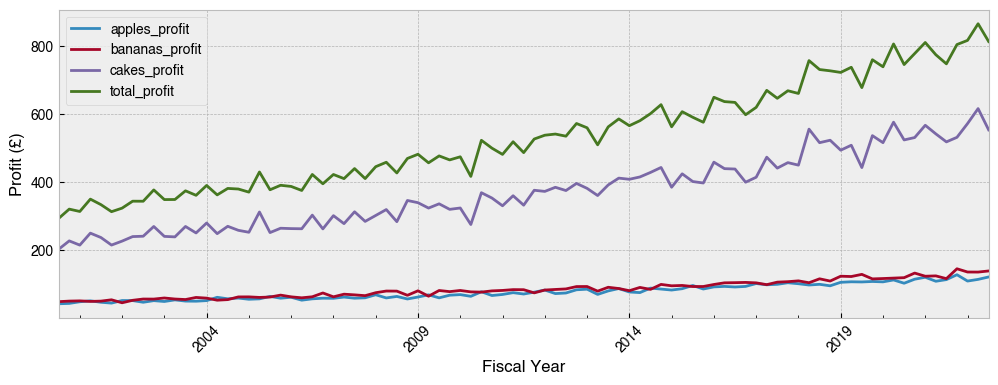

In [142]:
# Get the profit columns
profit_cols = df.columns[df.columns.str.endswith('profit')]
(
    df.groupby('Fiscal Year')[profit_cols]
    .mean()
    .plot(ylabel='Profit (£)', figsize=(12, 4), rot=45)
);

If you can master tricks like this in `pandas`, the world of time series data is at your fingertips. 

---

  - `pandas` - [Follow this link to learn more about Time Series / Date functionality](https://pandas.pydata.org/pandas-docs/version/0.23.0/timeseries.html)

---